# Lecture 21: Inference in Simple Linear Regression
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - Calcium and Mortality Rate 
*** 

Is calcium in your drinking water good for your health? In England and Wales, an investigation of environmental causes of disease was conducted. The annual mortality rate (percentage of deaths) and the calcium concentration in the drinking water supply were recorded for $61$ large towns. The data in mortality.csv represent the annual mortality rate averaged over the years 1958–1964, and the calcium concentration in parts per million. 

**Part A**: Load the data in Pandas and make a scatter plot with the calcium concentration as the feature on the horizontal axis and mortality rate as the response on the vertical axis. 

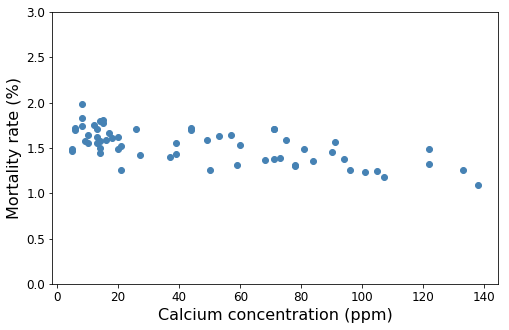

In [2]:
dfM = pd.read_csv("data/mortality.csv")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(dfM["Calc"], dfM["Rate"], color="steelblue")
ax.set_ylim([0,3]);
plt.xticks(range(0,150,20), fontsize=12)
plt.yticks(np.linspace(0,3,7), fontsize=12);
ax.set_xlabel("Calcium concentration (ppm)", fontsize=16)
ax.set_ylabel("Mortality rate (%)", fontsize=16);

The scatterplot shows a slight downward trend, which suggests that higher concentrations of calcium lead to lower mortality rates. The question is whether this is really the case or if the slight downward trend should be attributed to chance.

**Part B**: Use [stats.linregress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) to fit a linear regression model to the data of the form 

$$
Y_i = \alpha + \beta x_i + \epsilon_i, \quad \textrm{for } i=1,2, \ldots, 61 
$$

where $\epsilon \sim N(0,\sigma^2)$. In addition to the estimates of the model parameters, report the values of pval and stderr returned by stats.linregress.  

In [3]:
bhat, ahat, rval, pval, stderr = stats.linregress(dfM["Calc"], dfM["Rate"])
print("Fitted: Y = {:.5f} + {:.5f}x".format(ahat, bhat))
print("p - {}".format(pval))
print("stderr = {}".format(stderr))

Fitted: Y = 1.67636 + -0.00323x
p - 1.0331339260349543e-08
stderr = 0.00048472309461436864


**Part C**: The p-value and standard error returned by stats.linregress are associated with the slope coefficient $\beta$.  Compute the estimated variance $\hat{\sigma}^2$ and the standard error $SE(\hat{\beta})$ directly in Python.  Verify that your computed value for the standard error matches that returned by stats.linregress. 

**Part D**: Perform a hypothesis test at the $\alpha = 0.05$ significance level to determine if the observed relationship between calcium concentration and mortality rate is real by testing the hypotheses: 

$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$

Verify that your direct computations yield the same p-value returned by stats.linregress. Is there sufficient evidence to conclude that the observed relationship between calcium concentration and mortality rate is real? 


In [5]:
# COMPUTE CI
tval = stats.t.ppf(0.975, len(dfM["Calc"])-2)
CI = [ bhat - tval * SEbeta, bhat + tval * SEbeta]
print(CI)

NameError: name 'SEbeta' is not defined

### Exercise 2 - Variability of Slope in a Simple Linear Regression 
*** 

The function sim_data returns simulated data from the generative model $Y = 1 + 2x + \epsilon$ where $\epsilon \sim N(0, \sigma^2)$. In this exercise we'll look at the variability of the slope of the simple linear regression model fitted to realizations of the simulated data. 

In [12]:
def sim_data(n=20, sig=1, a=1, b=2):
    x = np.linspace(0,2,n)
    y = a + b*x + stats.norm.rvs(0, sig, size=n)
    return x, y 

**Part A**: Execute the following code to sample from the generative model, fit a simple linear regression model, and plot the results. 

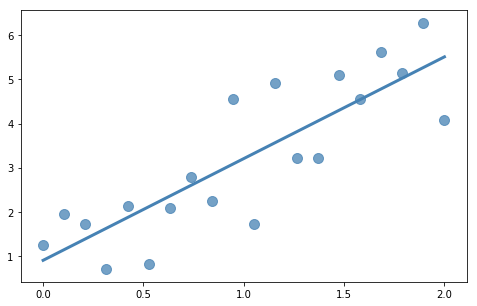

In [13]:
x, y = sim_data(n=20, sig=1, a=1, b=2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(x, y, color="steelblue", alpha=0.75, s=100)
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
ax.plot(x, ahat + bhat*x, color="steelblue", lw=3);
plt.xticks(np.linspace(0,2,5));

**Part B**: The following function computes 50 independent realizations of the model data and computes and plots the resulting simple linear regression.  We're interested in how the parameter $\sigma$ in the generative model affects the variability of the **slope** of the regression line.  Experiment with several variances and describe the results. 

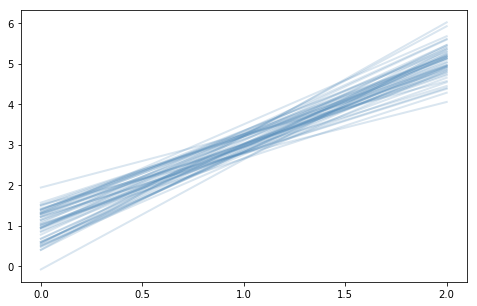

In [14]:
def variability(n=20, sig=1):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    for ii in range(50):
        x, y = sim_data(n=n, sig=sig, a=1, b=2)
        bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
        yhat = ahat + bhat*x
        ax.plot(x, yhat, color="steelblue", lw=2, alpha=0.2)
    plt.xticks(np.linspace(0,2,5))

variability(n=20, sig=1)

**Part C**: The following function computes num_samples independent realizations of the model data, computes the simple linear regression model, and histograms the resulting slopes. Experiment with different variances for the generative model. What do you notice about the resulting histograms?  

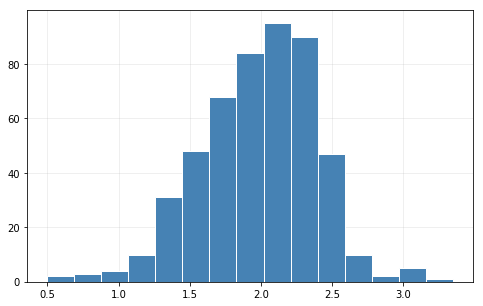

In [15]:
def slope_hist(n=20, sig=1, num_samples=500):
    
    slopes = np.zeros(num_samples)
    for ii in range(num_samples):
        x, y = sim_data(n=n, sig=sig, a=1, b=2)
        bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
        slopes[ii] = bhat 
        
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    pd.Series(slopes).hist(ax=ax, color="steelblue", edgecolor="white", bins=15)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    
slope_hist(sig=1)

**Part D**: Draw a single sample of size $n=20$ from sim_data with variance $\sigma^2 = 1$.  Use your sample to compute a 95% confidence interval for the slope.  Does the known slope from the model fall inside your confidence interval?  How does the variance $\sigma^2$ affect your 95% confidence interval? 

In [16]:
np.random.seed(1234)
x, y = sim_data(n=20, sig=1)
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
CI = # TODO 

SyntaxError: invalid syntax (<ipython-input-16-ec85e81ada3a>, line 4)

### Exercise 3 - The Coefficient of Determination and Goodness of Fit 
*** 

**Part A**: Complete the function R2 below to generate a sample from sim_data, compute a simple linear regression using stats.linregress, plot the resulting model and scatter plot, and return the $R^2$ value for the given fit.  How does the choice of $\sigma^2$ affect the $R^2$ value? 

In [ ]:
def R2_sim(n=40, sig=1):

    x, y = sim_data(n=40, sig=sig, a=1, b=2)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    ax.scatter(x, y, color="steelblue", alpha=0.75, s=100)
    bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
    ax.plot(x, ahat + bhat*x, color="steelblue", lw=3);
    plt.xticks(np.linspace(0,2,5));

    yhat = # TODO 
    SSE  = # TODO 
    SSR  = # TODO 
    SST  = # TODO 
    R2 = #TODO 
    
    return R2

In [ ]:
R2_sim(n=40, sig=1)

**Part B**: The $R^2$ value is actually reported (sorta) by stats.linregress through the rval quantity.  The relationship is $R^2 = (\textrm{rval})^2$.  Verify that your computed $R^2$ value above agrees with the value returned by stats.linregress. 